In [0]:
import numpy as np
import pandas as pd

In [0]:
dataset_file=pd.read_csv('Iris.csv')
dataset_np_array=np.asarray(dataset_file)

In [0]:
def unique_value(arr):
    unique_list=[]
    for i in arr:
        if i not in unique_list:
            unique_list.append(i)
    return(unique_list)

def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j
    return arr

def normalise(v):
    norm=np.linalg.norm(v)
    if norm==0:
        return v
    return(v/norm)

In [0]:
unique_value(dataset_np_array[:,-1])

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [0]:
for i in range(len(dataset_np_array[:,-1])):
    if dataset_np_array[i,-1]=='Iris-setosa':
        dataset_np_array[i,-1]=0
    elif dataset_np_array[i,-1]=='Iris-versicolor':
        dataset_np_array[i,-1]=1
    elif dataset_np_array[i,-1]=='Iris-virginica':
        dataset_np_array[i,-1]=2       


In [0]:
data_org=dataset_np_array[:,1:].astype(float)
np.random.shuffle(data_org)
data=normalise(data_org)

In [0]:
#train_data
data_train=data[0:int(0.7*len(data)),0:-1]
label_train1=data_org[0:int(0.7*len(data)):,-1]
label_train=(label_train1).reshape((len(label_train1),1))

#testing_data
data_test=data[int(0.7*len(data)):int(0.8*len(data)),0:-1]
label_test1=data_org[int(0.7*len(data)):int(0.8*len(data)):,-1]
label_test=(label_test1).reshape((len(label_test),1))


#Validation_data
data_validate=data[int(0.7*len(data)):,0:-1]
label_validate1=data_org[int(0.9*len(data)):,-1]
label_validate=(label_validate1).reshape((len(label_validate1),1))

In [0]:
y_train=np.asarray(to_one_hot(label_train.astype(int).flatten()))

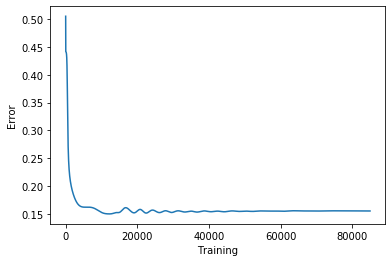

Training Accuracy 84.5%


In [0]:
w0 = 2*np.random.random((4, 5)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 2*np.random.random((5, 3)) - 1 #for layer 1 - 5 inputs, 3 outputs


#learning rate
n = 0.1

#Errors - for graph 
errors = []

#Train
for i in range(85000):

    #Feed forward
    layer0 = data_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

#Plot the accuracy chart
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")

In [0]:
y_test=np.asarray(to_one_hot(label_test.astype(int).flatten()))
layer0 = normalise(data_test)
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))
layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100
accuracy

73.12911133197854

In [0]:
def prediction(y_given,y_pred):
    for i in range(y_given.shape[0]):
        for j in range(y_given.shape[1]):
            if (y_pred[i,j])<0.5:
                y_pred[i,j]=np.floor(y_pred[i,j])
            else:
                y_pred[i,j]=np.ceil(y_pred[i,j])            
    return(y_pred)             

In [0]:
y_predicted=prediction(y_test,layer2)
y_pred=from_one_hot(y_predicted)

In [0]:
y_pred

array([[2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.]])

In [0]:
def confusion_matrix(org_mat,pred_mat):
    conf_mat=np.zeros((3,3))
    for i in range(len(org_mat)):
        if org_mat[i]==0 and pred_mat[i]==0:
            conf_mat[0,0]+=1
        elif org_mat[i]==0 and pred_mat[i]==1:
            conf_mat[0,1]+=1        
        elif org_mat[i]==0 and pred_mat[i]==2:
            conf_mat[0,2]+=1
        elif org_mat[i]==1 and pred_mat[i]==1:
            conf_mat[1,1]+=1
        elif org_mat[i]==1 and pred_mat[i]==0:
            conf_mat[1,0]+=1        
        elif org_mat[i]==1 and pred_mat[i]==2:
            conf_mat[1,2]+=1
        elif org_mat[i]==2 and pred_mat[i]==2:
            conf_mat[2,2]+=1
        elif org_mat[i]==2 and pred_mat[i]==0:
            conf_mat[2,0]+=1        
        elif org_mat[i]==2 and pred_mat[i]==1:
            conf_mat[2,1]+=1                
    return(conf_mat)

In [0]:
confusion_matrix(label_test,y_pred)

array([[2., 0., 0.],
       [2., 0., 4.],
       [0., 0., 7.]])